# Clothes Classification with Support Vector Machines

In this notebook we are going to explore the use of Support Vector Machines (SVM) for image classification. We are going to use a new version of the famous MNIST dataset (the original is a dataset of handwritten digits). The version we are going to use is called Fashion MNIST (https://pravarmahajan.github.io/fashion/) and is a dataset of small images of clothes and accessories.



The dataset labels are the following:

| Label | Description |
| --- | --- |
| 0 | T-shirt/top |
| 1 | Trouser |
| 2 | Pullover |
| 3 | Dress |
| 4 | Coat |
| 5 | Sandal |
| 6 | Shirt |
| 7 | Sneaker |
| 8 | Bag |
| 9 | Ankle boot |

## TODO: Insert your surname, name and ID number

Student name: Davide Maniscalco
    
ID: 1212063

In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_mldata
from sklearn.neural_network import MLPClassifier
import sklearn.metrics as skm

In [2]:
# helper function to load Fashion MNIST dataset
def load_mnist(path, kind='train'):
    import os
    import gzip
    import numpy as np
    labels_path = os.path.join(path, '%s-labels-idx1-ubyte.gz' % kind)
    images_path = os.path.join(path, '%s-images-idx3-ubyte.gz' % kind)
    with gzip.open(labels_path, 'rb') as lbpath:
        labels = np.frombuffer(lbpath.read(), dtype=np.uint8,offset=8)
    with gzip.open(images_path, 'rb') as imgpath:
        images = np.frombuffer(imgpath.read(), dtype=np.uint8,offset=16).reshape(len(labels), 784)
    return images, labels

In [3]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 1212063
np.random.seed(ID)

In [4]:
#load the Fashion MNIST dataset from the 'data' folder and let's normalize the features so that each value is in [0,1] 

X, y = load_mnist('data', kind='train')
# rescale the data
X, y = X / 255., y # original pixel values are between 0 and 255
print(X.shape, y.shape)

(60000, 784) (60000,)


Now split into training and test. Make sure that each label is present at least 10 times
in training. If it is not, then keep adding permutations to the initial data until this 
happens.

In [5]:
#random permute the data and split into training and test taking the first 500
#data samples as training and the rests as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 500

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)


Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [57 53 37 47 48 50 52 53 57 46]


In [6]:
#function for plotting a image and printing the corresponding label
def plot_input(X_matrix, labels, index):
    print("INPUT:")
    plt.imshow(
        X_matrix[index].reshape(28,28),
        cmap          = plt.cm.gray_r,
        interpolation = "nearest"
    )
    plt.show()
    print("LABEL: %i"%labels[index])
    return

INPUT:


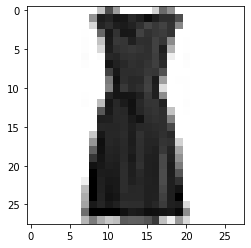

LABEL: 3
INPUT:


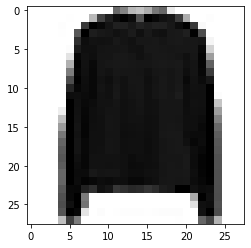

LABEL: 6
INPUT:


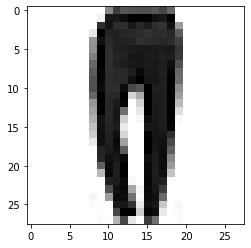

LABEL: 1
INPUT:


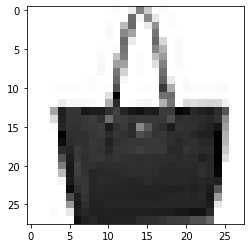

LABEL: 8


In [7]:
#let's try the plotting function
plot_input(X_train,y_train,5)
plot_input(X_test,y_test,50)
plot_input(X_test,y_test,500)
plot_input(X_test,y_test,5000)

## TO DO 1
Use a SVM classifier with cross validation to pick a model. Use a 4-fold cross-validation. Let's start with a Linear kernel:

In [8]:
#import SVC
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]}

#run linear SVM
linear = SVC(kernel='linear')
linear_cv = GridSearchCV(linear, parameters, cv=4, return_train_score=True)
linear_cv.fit(X_train, y_train)

/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=4, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='linear',
                           max_iter=-1, probability=False, random_state=None,
                           shrinking=True, tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0005, 0.005, 0.05, 0.5, 5, 50, 500]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring=None, verbose=0)

In [9]:
import pandas as pd
print ('RESULTS FOR LINEAR KERNEL')
print("Best parameters set found: ",linear_cv.best_params_)
print("Score with best parameters: " ,linear_cv.best_score_)
print("All scores on the grid:")
linear_scores=pd.DataFrame(linear_cv.cv_results_)           #.iloc[:,[4,10,17]]
linear_scores

RESULTS FOR LINEAR KERNEL
Best parameters set found:  {'C': 0.05}
Score with best parameters:  0.794
All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.532678,0.003801,0.113846,0.003318,0.0005,{'C': 0.0005},0.415385,0.376,0.414634,0.393443,0.400,0.016392,7,0.402703,0.402667,0.408488,0.412698,0.406639,0.004225
1,0.279664,0.006547,0.095359,0.003204,0.005,{'C': 0.005},0.784615,0.760,0.739837,0.729508,0.754,0.021176,6,0.786486,0.781333,0.806366,0.796296,0.792621,0.009585
2,0.192705,0.000895,0.075239,0.001424,0.05,{'C': 0.05},0.823077,0.792,0.796748,0.762295,0.794,0.021632,1,0.945946,0.949333,0.941645,0.944444,0.945342,0.002774
3,0.197124,0.002271,0.076523,0.003322,0.5,{'C': 0.5},0.761538,0.800,0.788618,0.737705,0.772,0.024070,2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,0.196560,0.002383,0.074635,0.002792,5,{'C': 5},0.761538,0.800,0.788618,0.729508,0.770,0.026999,3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.195453,0.002984,0.073794,0.002686,50,{'C': 50},0.761538,0.800,0.788618,0.729508,0.770,0.026999,3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.196198,0.001954,0.074248,0.001615,500,{'C': 500},0.761538,0.800,0.788618,0.729508,0.770,0.026999,3,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## TO DO 2
Pick a model for the Polynomial kernel with degree=2:

In [10]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

poly = SVC(kernel='poly',degree = 2)
poly_cv = GridSearchCV(poly, parameters, cv=4, return_train_score=True)
poly_cv.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=2 KERNEL')
print("Best parameters set found:",poly_cv.best_params_)
print("Score with best parameters:",poly_cv.best_score_)
print("\nAll scores on the grid:")

poly_scores=pd.DataFrame(poly_cv.cv_results_)    #.iloc[:,[4,10,17]]
poly_scores


/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE=2 KERNEL
Best parameters set found: {'C': 0.05, 'gamma': 0.5}
Score with best parameters: 0.778

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.220190,0.004583,0.075388,0.001554,0.05,0.05,"{'C': 0.05, 'gamma': 0.05}",0.723077,0.744,0.723577,0.688525,0.720,0.019782,9,0.875676,0.864000,0.883289,0.880952,0.875979,0.007446
1,0.188493,0.005387,0.066946,0.003356,0.05,0.5,"{'C': 0.05, 'gamma': 0.5}",0.784615,0.800,0.772358,0.754098,0.778,0.016721,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,0.185189,0.003142,0.067262,0.003411,0.05,5,"{'C': 0.05, 'gamma': 5.0}",0.784615,0.800,0.772358,0.754098,0.778,0.016721,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,0.184978,0.004659,0.067665,0.004128,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.807692,0.784,0.764228,0.745902,0.776,0.023071,8,0.989189,0.989333,0.992042,0.989418,0.989996,0.001184
4,0.185975,0.003204,0.066526,0.002968,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.784615,0.800,0.772358,0.754098,0.778,0.016721,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
5,0.183367,0.002446,0.065696,0.002394,0.5,5,"{'C': 0.5, 'gamma': 5.0}",0.784615,0.800,0.772358,0.754098,0.778,0.016721,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.181976,0.003576,0.067514,0.005409,5,0.05,"{'C': 5, 'gamma': 0.05}",0.784615,0.800,0.772358,0.754098,0.778,0.016721,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.185701,0.002715,0.066806,0.004086,5,0.5,"{'C': 5, 'gamma': 0.5}",0.784615,0.800,0.772358,0.754098,0.778,0.016721,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.184527,0.002769,0.067024,0.002832,5,5,"{'C': 5, 'gamma': 5.0}",0.784615,0.800,0.772358,0.754098,0.778,0.016721,1,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## TO DO 3

Now let's try a higher degree for the polynomial kernel.

In [11]:
# parameters for poly with higher degree kernel
parameters = {'C': [0.05, 0.5, 5],'gamma':[0.05,0.5,5.]}

#run SVM with poly of higher degree kernel
degree = 3
poly3 = SVC(kernel='poly',degree = degree)
poly3_cv = GridSearchCV(poly3, parameters, cv=4, return_train_score=True)
poly3_cv.fit(X_train,y_train)

print ('RESULTS FOR POLY DEGREE=', degree, ' KERNEL')
print("Best parameters set found:",poly3_cv.best_params_)
print("Score with best parameters:",poly3_cv.best_score_)
print("\nAll scores on the grid:")

poly3_scores=pd.DataFrame(poly3_cv.cv_results_)
poly3_scores

/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR POLY DEGREE= 3  KERNEL
Best parameters set found: {'C': 0.5, 'gamma': 0.05}
Score with best parameters: 0.756

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.191960,0.002572,0.064265,0.002219,0.05,0.05,"{'C': 0.05, 'gamma': 0.05}",0.738462,0.752,0.715447,0.696721,0.726,0.021117,9,0.951351,0.944,0.960212,0.949735,0.951325,0.005813
1,0.168599,0.003665,0.060682,0.002297,0.05,0.5,"{'C': 0.05, 'gamma': 0.5}",0.784615,0.760,0.747967,0.696721,0.748,0.032034,2,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
2,0.168816,0.003623,0.060507,0.002181,0.05,5,"{'C': 0.05, 'gamma': 5.0}",0.784615,0.760,0.747967,0.696721,0.748,0.032034,2,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
3,0.175283,0.004786,0.064100,0.004174,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.792308,0.776,0.747967,0.704918,0.756,0.033095,1,0.994595,0.992,1.000000,0.992063,0.994665,0.003253
4,0.168888,0.004197,0.060577,0.001857,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.784615,0.760,0.747967,0.696721,0.748,0.032034,2,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
5,0.170005,0.003981,0.062347,0.002163,0.5,5,"{'C': 0.5, 'gamma': 5.0}",0.784615,0.760,0.747967,0.696721,0.748,0.032034,2,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
6,0.170957,0.003974,0.062751,0.002794,5,0.05,"{'C': 5, 'gamma': 0.05}",0.784615,0.760,0.747967,0.696721,0.748,0.032034,2,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
7,0.168583,0.003048,0.061010,0.001239,5,0.5,"{'C': 5, 'gamma': 0.5}",0.784615,0.760,0.747967,0.696721,0.748,0.032034,2,1.000000,1.000,1.000000,1.000000,1.000000,0.000000
8,0.169604,0.004346,0.062299,0.001672,5,5,"{'C': 5, 'gamma': 5.0}",0.784615,0.760,0.747967,0.696721,0.748,0.032034,2,1.000000,1.000,1.000000,1.000000,1.000000,0.000000


## TO DO 4
Pick a model for the Radial Basis Function kernel:

In [12]:
# parameters for rbf SVM
parameters = {'C': [0.5, 5, 50, 500],'gamma':[0.005, 0.05, 0.5,5]}

rbf = SVC(kernel='rbf')
rbf_cv = GridSearchCV(rbf, parameters, cv=4, return_train_score=True)
rbf_cv.fit(X_train,y_train)

print ('RESULTS FOR rbf KERNEL')
print("Best parameters set found:",rbf_cv.best_params_)
print("Score with best parameters:",rbf_cv.best_score_)
print("\nAll scores on the grid:")

rbf_scores=pd.DataFrame(rbf_cv.cv_results_)
rbf_scores

/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.005}
Score with best parameters: 0.786

All scores on the grid:


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,mean_train_score,std_train_score
0,0.341491,0.005492,0.103617,0.003090,0.5,0.005,"{'C': 0.5, 'gamma': 0.005}",0.776923,0.760,0.723577,0.713115,0.744,0.026099,7,0.786486,0.778667,0.782493,0.806878,0.788631,0.010892
1,0.564161,0.010935,0.106984,0.003303,0.5,0.05,"{'C': 0.5, 'gamma': 0.05}",0.676923,0.728,0.682927,0.647541,0.684,0.028664,8,0.905405,0.904000,0.901857,0.912698,0.905990,0.004074
2,0.593575,0.009931,0.111864,0.002316,0.5,0.5,"{'C': 0.5, 'gamma': 0.5}",0.130769,0.112,0.113821,0.122951,0.120,0.007594,13,0.235135,0.237333,0.233422,0.232804,0.234674,0.001757
3,0.615877,0.005029,0.124013,0.005045,0.5,5,"{'C': 0.5, 'gamma': 5}",0.223077,0.208,0.227642,0.221311,0.220,0.007297,9,0.227027,0.229333,0.228117,0.227513,0.227998,0.000862
4,0.241545,0.006025,0.084853,0.002075,5,0.005,"{'C': 5, 'gamma': 0.005}",0.823077,0.808,0.772358,0.737705,0.786,0.033065,1,0.956757,0.957333,0.954907,0.952381,0.955345,0.001932
5,0.591445,0.010659,0.111938,0.003910,5,0.05,"{'C': 5, 'gamma': 0.05}",0.746154,0.808,0.756098,0.721311,0.758,0.031477,4,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
6,0.610254,0.010119,0.116307,0.005531,5,0.5,"{'C': 5, 'gamma': 0.5}",0.161538,0.176,0.178862,0.139344,0.164,0.015500,10,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,0.619614,0.009822,0.118845,0.002716,5,5,"{'C': 5, 'gamma': 5}",0.130769,0.112,0.113821,0.122951,0.120,0.007594,13,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,0.246592,0.006580,0.083014,0.002324,50,0.005,"{'C': 50, 'gamma': 0.005}",0.769231,0.816,0.788618,0.737705,0.778,0.028371,2,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
9,0.591030,0.014337,0.109729,0.003801,50,0.05,"{'C': 50, 'gamma': 0.05}",0.746154,0.808,0.756098,0.721311,0.758,0.031477,4,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


## TO DO5
What do you observe when using RBF and polynomial kernels on this dataset ?

The polinomial kernels have scores worse than the linear (and the RBF) one, but the scores are less dependent by the parameter: even very different parameters lead to similar scores. The linear kernel also shows this behaviour. This is not the case for the RBF kernel, that however presents a better score than polynomial kernels for the best C, and we are interest in using the best C.

## TO DO 6
The best score is the one of the linear kernel. However, in what follows it will be used the RBF one, that a posteriori shows *much* better results

In [13]:
print ('RESULTS FOR rbf KERNEL')
print("Best parameters set found:",rbf_cv.best_params_)
print("Score with best parameters:",rbf_cv.best_score_)
print('\n')
print ('RESULTS FOR LINEAR KERNEL')
print("Best parameters set found: ",linear_cv.best_params_)
print("Score with best parameters: " ,linear_cv.best_score_)

RESULTS FOR rbf KERNEL
Best parameters set found: {'C': 5, 'gamma': 0.005}
Score with best parameters: 0.786


RESULTS FOR LINEAR KERNEL
Best parameters set found:  {'C': 0.05}
Score with best parameters:  0.794


In [14]:
#get training and test error for the best SVM model from CV
best_SVM = SVC(C=rbf_cv.best_params_['C'],gamma=rbf_cv.best_params_['gamma'])
best_SVM.fit(X_train,y_train)

training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)

print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.046000
Best SVM test error: 0.200084


## More data
Now let's do the same but using more data points for training.


Choose a new number of data points.

In [15]:
X = X[permutation]
y = y[permutation]

m_training = 2000 # TODO number of data points, adjust depending on the capabilities of your PC

X_train, X_test = X[:m_training], X[m_training:]
y_train, y_test = y[:m_training], y[m_training:]

labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

Labels in training dataset:  [0 1 2 3 4 5 6 7 8 9]
Frequencies in training dataset:  [216 207 202 199 189 201 208 190 189 199]


Let's try to use SVM with parameters obtained from the best model for $m_{training} =  2000$. Since it may take a long time to run, you can decide to just let it run for some time and stop it if it does not complete. If you decide to do this, report it in the TO DO 9 cell below.

### TO DO 7

In [16]:
#get training and test error for the best SVM model from CV

best_SVM = SVC(C=rbf_cv.best_params_['C'],gamma=rbf_cv.best_params_['gamma'])
best_SVM.fit(X_train,y_train)

SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.005, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [17]:
training_error = 1. - best_SVM.score(X_train,y_train)
test_error = 1. - best_SVM.score(X_test,y_test)


print ("Best SVM training error: %f" % training_error)
print ("Best SVM test error: %f" % test_error)

Best SVM training error: 0.059500
Best SVM test error: 0.165414


Just for comparison, let's also use logistic regression (with standard parameters from scikit-learn, i.e. some regularization is included).

### TO DO 8 Try first without regularization (use a very large large C)

In [18]:
from sklearn import linear_model

LRnoreg = linear_model.LogisticRegression(C=1e8)
LRnoreg.fit(X_train,y_train)

training_error = 1. - LRnoreg.score(X_train,y_train)
test_error = 1. - LRnoreg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)

/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.000000
Best logistic regression test error: 0.232621


### TO DO 9 Then use also some regularization 

In [19]:
LRreg = linear_model.LogisticRegression()
LRreg.fit(X_train,y_train)

training_error = 1. - LRreg.score(X_train,y_train)
test_error = 1. - LRreg.score(X_test,y_test)

print ("Best logistic regression training error: %f" % training_error)
print ("Best logistic regression test error: %f" % test_error)


/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/home/davide/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Best logistic regression training error: 0.037000
Best logistic regression test error: 0.184017


## TO DO 10
Compare and discuss:
- the results from SVM with m=500 and with m=2000 training data points. If you stopped the SVM, include such aspect in your comparison.
- the results of SVM and of Logistic Regression with and without regularization


The training error remained almost the same (it passed from 0.046 to 0.05) while the test error decreased. This is what is expected: more training data lead to a better learning.

Concerning the logistic regression, the case without regularization has 0 training error (that leads to think that an overfitting may be present) and a test error about 0.23. Instead, the case with the regularization shows a few larger training error but a smaller test error: this model is better, as expected.

## TO DO 10
Plot an item of clothing that is missclassified by logistic regression and correctly classified by SVM.

In [20]:
LR_prediction = LRreg.predict(X_test)
SVM_prediction = best_SVM.predict(X_test)

In [21]:
mask = ((LR_prediction != y_test) & (SVM_prediction == y_test))
indices = [ii for ii in range(len(mask)) if(mask[ii]==True)]
item = np.random.choice(indices)

INPUT:


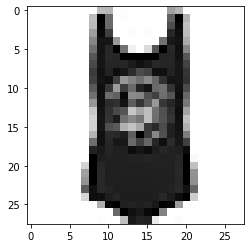

LABEL: 0
Label predicted by LR: 3
Label predicted by SVM: 0


In [22]:
plot_input(X_test,y_test,item)
print('Label predicted by LR:',LR_prediction[item])
print('Label predicted by SVM:',SVM_prediction[item])

## TO DO 11
Plot the confusion matrix for the SVM classifier and for logistic regression.
The confusion matrix has one column for each predicted label and one row for each true label. 
It shows for each class in the corresponding row how many samples belonging to that class gets each possible output label.
Notice that the diagonal contains the correctly classified samples, while the other cells correspond to errors.
You can obtain it with the sklearn.metrics.confusion_matrix function (see the documentation).
Try also to normalize the confusion matrix by the number of samples in each class in order to measure the accuracy on each single class.


In [23]:
# for better aligned printing of confusion matrix use floatmode='fixed' (not supported in all versions of Python)
np.set_printoptions(precision=2, suppress=True) 

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

confusion_SVM = skm.confusion_matrix(y_test, SVM_prediction)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )

confusion_LR = skm.confusion_matrix(y_test, LR_prediction)
print("\n Confusion matrix LR  \n \n", confusion_LR)
print("\n Confusion matrix LR (normalized)   \n \n", confusion_LR /counts[:,None] )

Labels and frequencies in test set:  [5784 5793 5798 5801 5811 5799 5792 5810 5811 5801]

 Confusion matrix SVM  
 
 [[4970    6   93  168   19    5  456    0   66    1]
 [  41 5483   60  166    6    1   33    0    3    0]
 [  93    5 4348   48  517    4  750    0   33    0]
 [ 415   39   40 4855  227    0  203    0   21    1]
 [  19    4  729  265 4105    1  667    0   20    1]
 [   9    0    0    4    0 5280    4  315   31  156]
 [1223    8  653  114  426    2 3273    0   90    3]
 [   0    0    0    0    0  320    0 5144   13  333]
 [  28    2   41   78   22   36  114   31 5450    9]
 [   0    0    1    7    0   97    2  194    2 5498]]

 Confusion matrix SVM (normalized)   
 
 [[0.86 0.   0.02 0.03 0.   0.   0.08 0.   0.01 0.  ]
 [0.01 0.95 0.01 0.03 0.   0.   0.01 0.   0.   0.  ]
 [0.02 0.   0.75 0.01 0.09 0.   0.13 0.   0.01 0.  ]
 [0.07 0.01 0.01 0.84 0.04 0.   0.03 0.   0.   0.  ]
 [0.   0.   0.13 0.05 0.71 0.   0.11 0.   0.   0.  ]
 [0.   0.   0.   0.   0.   0.91 0.   0.05 0.0

## TO DO 12
Have a look at the confusion matrices and comment on the obtained accuracies. Why some classes have lower accuracies and others an higher one ? Make some guesses on the possible causes.

### ANSWER TO THE QUESTION


Looking at the diagonal elements, we can see that some classes are very well classified (e.g. 0,1,3,5,7,8,9) some others a bit worse (e.g. 2,4) and one very badly (6). The 6-th class is the one of the shirt, and it can be seen that a very big number (about 1/3 of the correctly classified ones) of shirt-samples are classified as t-shirts. This is probably due to the similarity between these, but the shirts have a much higher score (the shirt pattern has been learned well). Also the other misclassifications are due to similarities between the clothes: often pullovers (class 2) are classified as coats (class 4) and vice-versa.